# Thresholding
## 1. Simple thresholding
We apply same value of threshold to every pixel. If the pixel value is smaller than threshold we set it 0, otherwise set to maximum value (defined by constraint). We use cv.threshold

## 2. Adaptive thresholding
Adaptive thresholding determines the threshold for a pixel based on a small region around the pixel - therefore, we get different threshold for each different region which ideally gives better results for image with varying illumination - used for image that has different lighting conditions

More info: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

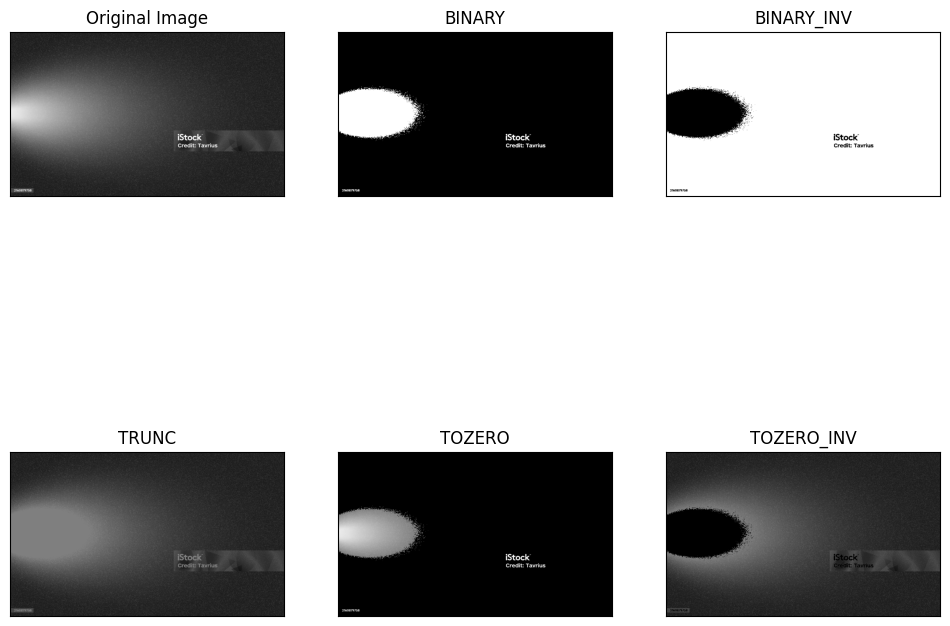

In [21]:
plt.figure(figsize=(12, 10))

img = cv2.imread('./assets/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# print(min(np.min(img, axis=1)), max(np.max(img, axis=1))) # 17 255

threshold = 127
ret, thresh1 = cv2.threshold(src=img, thresh=threshold, maxval=255, type=cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(src=img, thresh=threshold, maxval=255, type=cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(src=img, thresh=threshold, maxval=255, type=cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(src=img, thresh=threshold, maxval=255, type=cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(src=img, thresh=threshold, maxval=255, type=cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

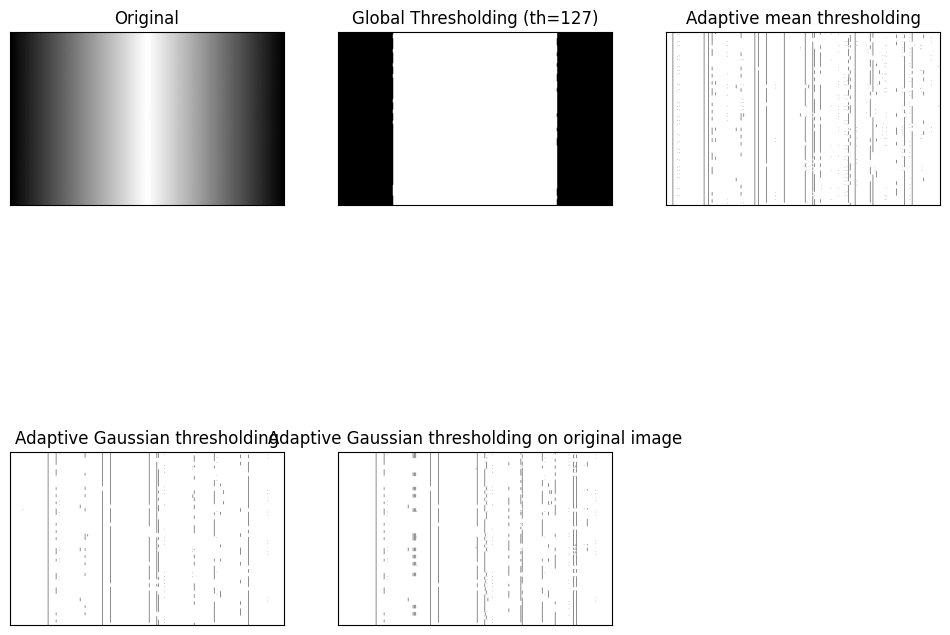

In [24]:
plt.figure(figsize=(12, 10))

img = cv2.imread('./assets/gradient_2.jpg', cv2.IMREAD_GRAYSCALE)
blured = cv2.medianBlur(img, 5)

_, th1 = cv2.threshold(src=blured, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(src=blured, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=3, C=1)
th3 = cv2.adaptiveThreshold(src=blured, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=3, C=1)

th4 = cv2.adaptiveThreshold(src=img, maxValue=255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY, blockSize=3, C=1)

titles = ['Original', 'Global Thresholding (th=127)', 'Adaptive mean thresholding', 'Adaptive Gaussian thresholding', 'Adaptive Gaussian thresholding on original image']
images = [blured, th1, th2, th3, th4]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

Otsu's binarization

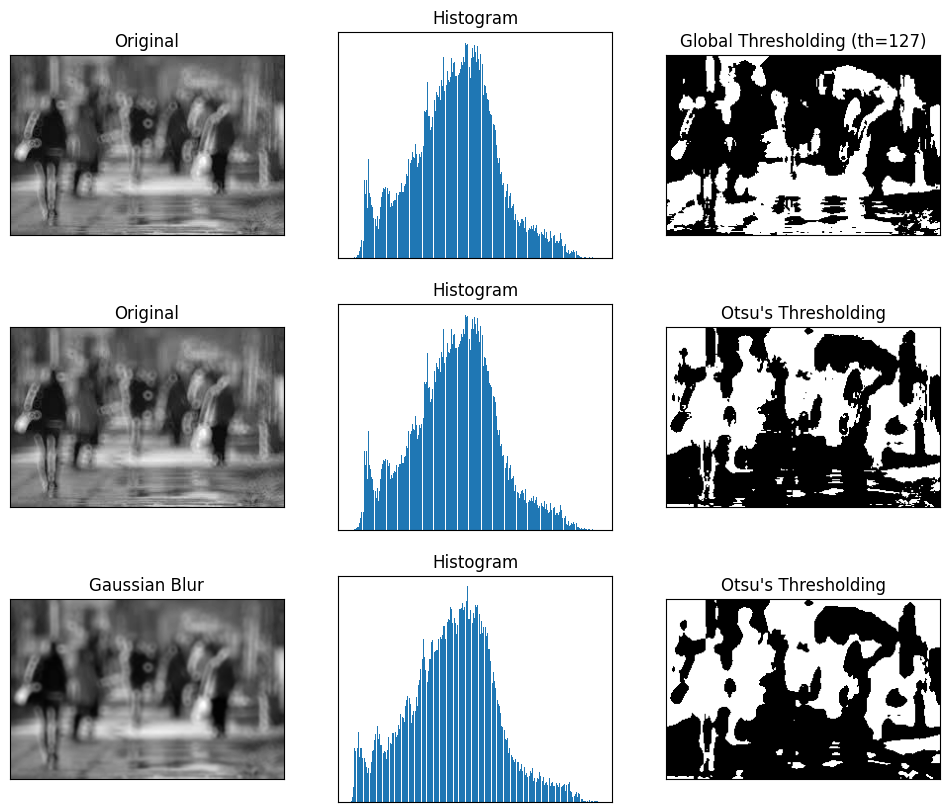

In [25]:
plt.figure(figsize=(12, 10))

img = cv2.imread('./assets/blur.jpg', cv2.IMREAD_GRAYSCALE)

_, th1 = cv2.threshold(src=img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

# Raw Otsu's thresholding
_, th2 = cv2.threshold(src=img, thresh=0, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Otsu's thresholding after gaussian normalization
blur = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=0)
_, th3 = cv2.threshold(src=blur, thresh=0, maxval=255, type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

images = [img, 0, th1, 
          img, 0, th2, 
          blur, 0, th3]
titles = ['Original', 'Histogram', 'Global Thresholding (th=127)',
          'Original', 'Histogram', "Otsu's Thresholding",
          'Gaussian Blur', 'Histogram', "Otsu's Thresholding"
          ]

for i in range(3):
    plt.subplot(3, 3, i*3 + 1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, i*3 + 2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3 + 1])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, i*3 + 3)
    plt.imshow(images[i*3 + 2], 'gray')
    plt.title(titles[i*3 + 2])
    plt.xticks([])
    plt.yticks([])

plt.show()